In [1]:
##Part.1

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [2]:
#Load the dateset
dt = pd.read_csv(r'C:/Users/withm/OneDrive/Desktop/DTSC 710 (Fri)/Homework/hw2/PlayTennis.csv')
display(dt)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
#Convert string data types to numberic using label encoder = LabelEncoder()
le = LabelEncoder()
dt['outlook'] = le.fit_transform(dt['outlook'])
dt['temp'] = le.fit_transform(dt['temp'])
dt['humidity'] = le.fit_transform(dt['humidity'])
dt['windy'] = le.fit_transform(dt['windy'])
dt['play'] = le.fit_transform(dt['play'])
display(dt)

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [4]:
# Split the data set into training and tesing sets
X = dt.drop(['play'], axis = 1)
y = dt['play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Train a decision tree classifier on the training set
dtc = DecisionTreeClassifier(criterion = 'gini', random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

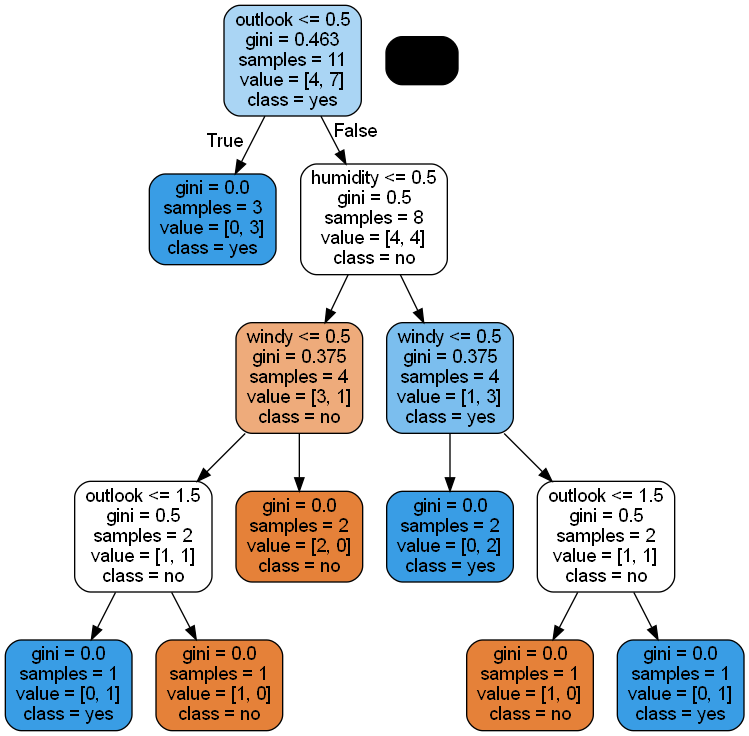

In [6]:
#Visualize the decision tree
dot_data = export_graphviz(dtc, filled=True, rounded=True, feature_names=X.columns, class_names=['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
##Part.2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [10]:
#Load the dataset
dt2 = pd.read_csv(r'C:/Users/withm/OneDrive/Desktop/DTSC 710 (Fri)/Homework/hw2/winequality-red.csv')
display(dt2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
#Create three class labels based on quality ratings
conditions = [
    dt2['quality'] <= 4,
    (dt2['quality'] > 4) & (dt2['quality'] < 7),
    dt2['quality'] >= 7
]
choices = ['bad', 'decent', 'excellent']
dt2['class'] = pd.Series(np.select(conditions, choices))
display(dt2[['quality','class']])

,quality,class
0,5,decent
1,5,decent
2,5,decent
3,6,decent
4,5,decent
...,...,...
1594,5,decent
1595,6,decent
1596,6,decent
1597,5,decent


In [19]:
# Split the dataset into training and testing sets
X = dt2.drop(['quality', 'class'], axis=1)
y = dt2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train a random forest classifier on the training set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Evaluate the performance of the classifier on the testing set
accuracy = rf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.865625
